In [12]:
import tributary.lazy as tl
import greeks as gk
from datetime import datetime, timedelta

In [13]:
# Instantiate an environment
# This lets us keep a uniform notion of "now"
e = gk.Env()

In [14]:
# instatiate a rate for our risk free rate
rfr = gk.Rate(env=e)

# instantiate an equity to represent our underlying
asset = gk.Equity(env=e)

In [15]:
# fix point in time
e.now().setValue(datetime.today())

# set value of asset and rfr as of today
rfr.setValue(0.09) # 9%
asset.setValue(200) # $200 underlying asset price at start

# instantiate a point in time at which our contract began
start = gk.Point(e.now().eval(), name="Start")  # start now

In [16]:
# now we instantiate our forward contract
n = gk.Forward(env=e, start=start, underlying=asset, risk_free_rate=rfr)

In [6]:
# Because the start date of our contract equals the end date, we expect the value of the forward to equal the current value
n.value()

200.0

In [7]:
# Let's set the start date some time in the past, like 1 year ago
start.setValue(datetime.today() - timedelta(days=365))

In [11]:
# Now when we evaluate the value of the contract, we see that it would be worth $183, since we expect to gain 9% risk free
n.value()

194.17475789401388

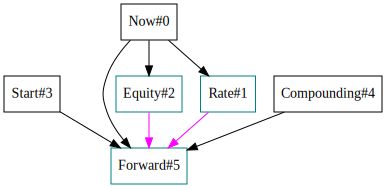

In [9]:
# The dependency graph is quite simple
n.node().graphviz()

In [10]:
# If we adjust the risk free rate as of 1 year ago, how do things change?
rfr.setValue(0.03)